<a href="https://colab.research.google.com/github/araujorobert/Multivariant-Statistics/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importamos librerias y datos

In [1]:
import numpy   as np
import scipy   as sc
import sklearn as sk
import pandas  as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing  import scale
from sklearn.datasets       import load_iris

# Cargamos los datos
X = load_iris().data

## K means a pie

In [2]:
n, p = X.shape

def Kmeans(x1, x2, k, dist, max_iters=30, viz=True):
  
 
  colors = ["blue", "green", "red", "orange", "yellow", "skyblue", "lightgreen", "salmon"]
  
  
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Inicialización aleatoria de los centroides.
  ic    = [np.random.choice(x1.shape[0]) for i in range(k)]
  centr = np.array([x1[ic, 0], x2[ic, 0]]).T

  # Visualiza la posición de los centroides.
  for c in range(k):
    if viz: plt.plot(centr[c, 0], centr[c, 1], marker="X", markersize=15, c=colors[c])

  # Visualiza la nube de datos.
  if viz: plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)
  if viz: plt.show()
  
  ### Implementemos K-means ###
  
  for iter in range(max_iters):

    distances = []

    for c in centr:
      # Guardamos las distancias de cada punto a cada centroide.
      distances.append([dist(c, [x1[i,0], x2[i,0]]) for i in range(x1.shape[0])])

    # Asignamos a cada datapoint al cluster más cercano.
    c_indexes = np.argmin(distances, axis=0)

    for c in range(k):

      # Visualizamos de cada color la nube de puntos seleccionada.
      if viz: p = plt.scatter(x1[c_indexes == c, 0],  
                              x2[c_indexes == c, 0], alpha=0.5, c=colors[c])

      if viz: plt.plot(centr[c, 0], centr[c, 1], c=colors[c], marker="X", markersize=15)
      
      # Actualizamos la posición del centroide.
      centr[c, 0] = np.mean(x1[c_indexes == c, 0]) if np.sum(x1[c_indexes == c, 0]) != 0 else 0
      centr[c, 1] = np.mean(x2[c_indexes == c, 0]) if np.sum(x2[c_indexes == c, 0]) != 0 else 0
    
    plt.show()
    
  return centr, c_indexes, np.array(distances)  

In [3]:
# Función de distancia Euclidea entre dos puntos.
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

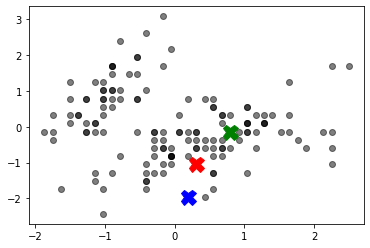

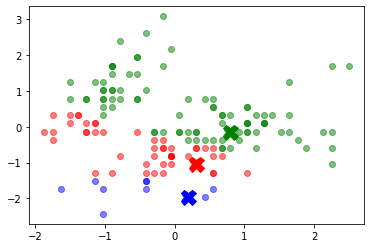

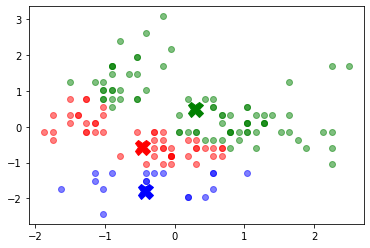

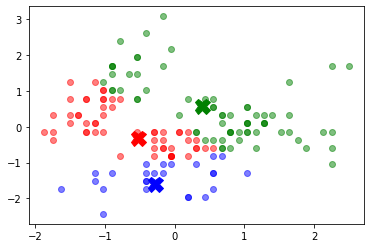

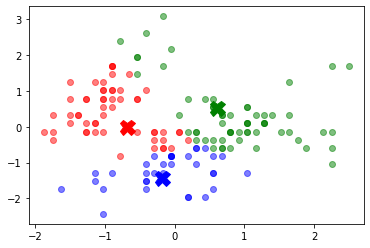

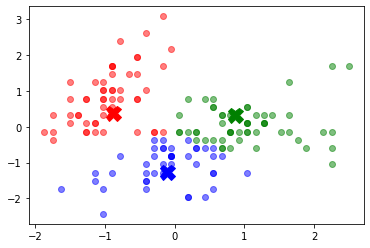

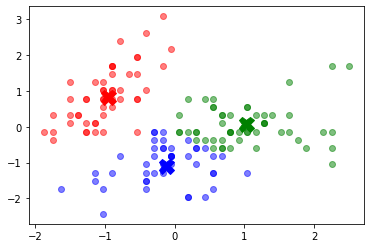

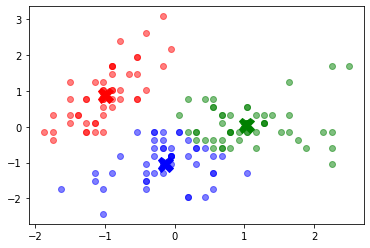

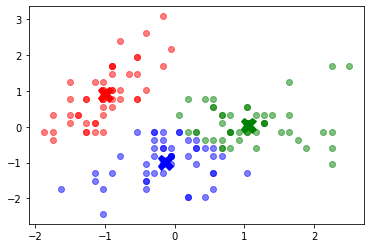

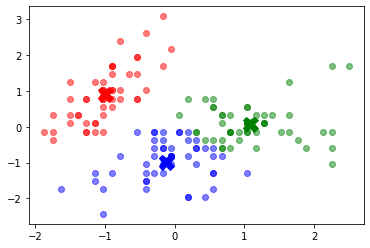

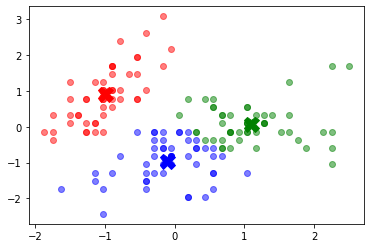

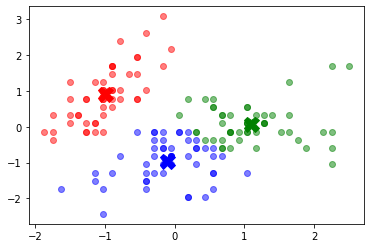

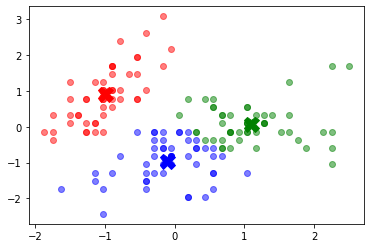

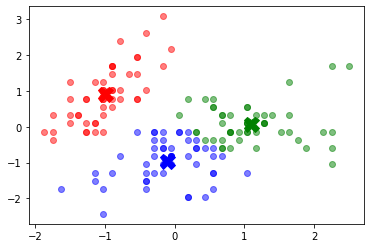

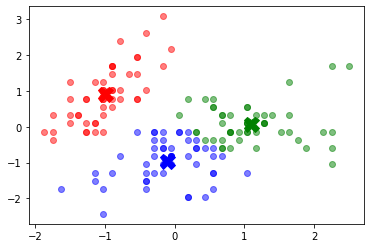

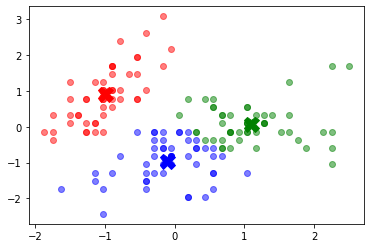

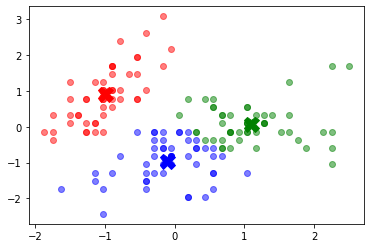

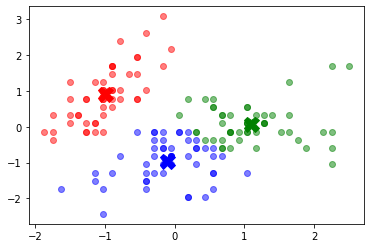

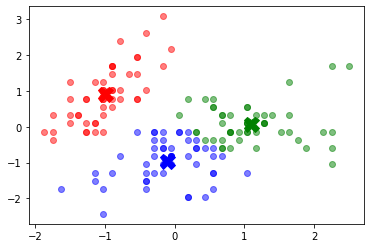

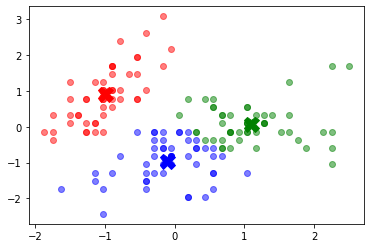

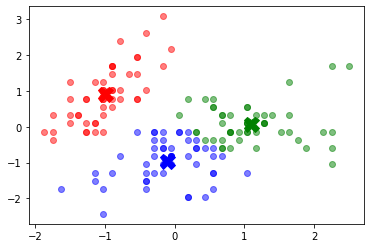

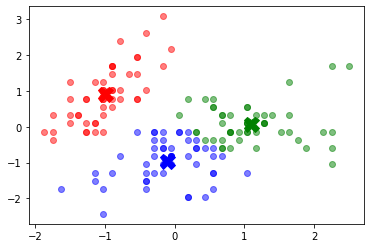

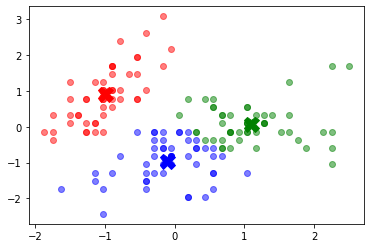

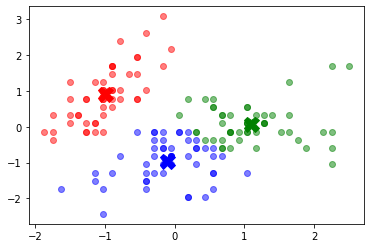

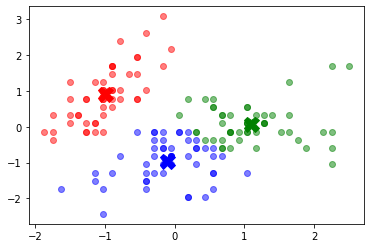

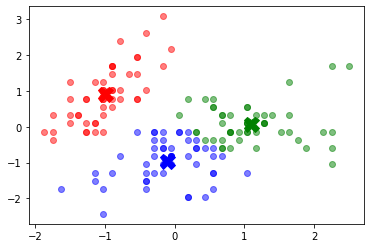

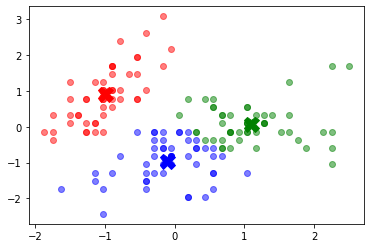

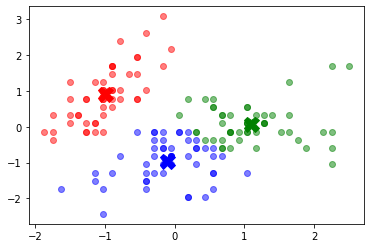

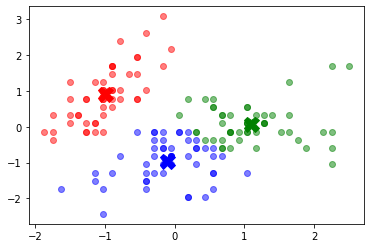

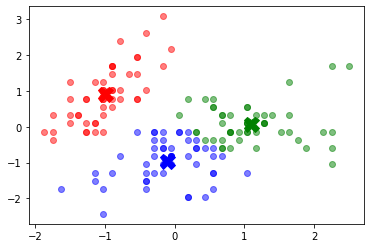

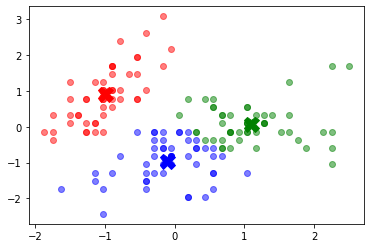

In [5]:
# Visualizamos la función:
centr, Y, distances = Kmeans(X[:, 0:1], X[:, 1:2], 3, dist, viz=True)

## K means usando sklearn

In [6]:
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()
X_features = iris.data[:, :2]
y_labels = iris.target
km = KMeans(n_clusters = 3, init='k-means++')
km.fit(X_features)

KMeans(n_clusters=3)

In [7]:
# Centros 
centers = km.cluster_centers_
print(centers)

[[5.006      3.428     ]
 [5.77358491 2.69245283]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'Kmeans')

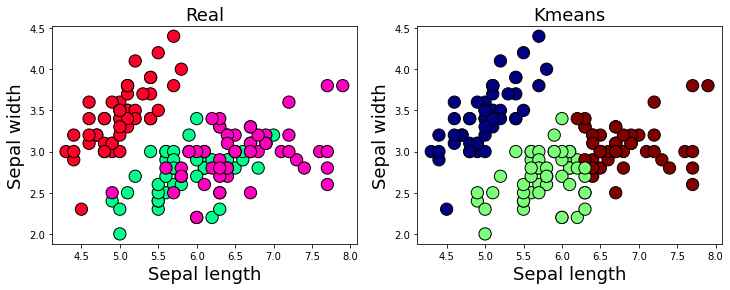

In [8]:
# Comparemos la clasificación que tenemos con la obtenida por Kmean++

new_labels = km.labels_

# Plot 

fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].scatter(X[:, 0], X[:, 1], c=y_labels, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].set_title('Real', fontsize=18)
axes[1].set_title('Kmeans', fontsize=18)

## Revisión de errores

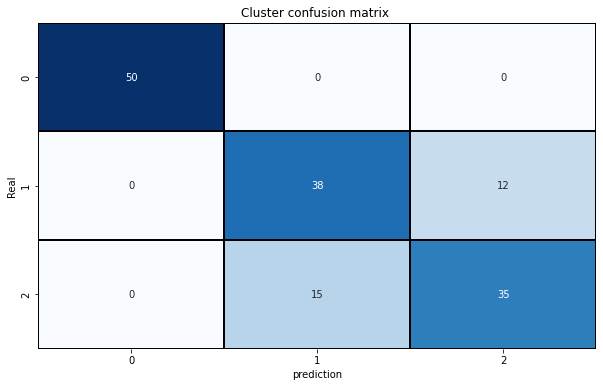

In [35]:
import pandas as pd
import seaborn as sb

plt.figure(figsize=(10,6))
revision = pd.DataFrame({'Real':iris.target, 'prediction':km.labels_})
tabla = pd.crosstab(revision.Real, revision.prediction)
sb.heatmap(tabla, annot=True, fmt='d', cmap='Blues', linewidth=1.2, linecolor='Black', cbar=False)
plt.title('Cluster confusion matrix ')
plt.show()